In [1]:
import pandas as pd

df = pd.read_parquet("training_samples.parquet")
df.rename(columns={"label_name": "label"}, inplace=True)
df

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
95,data/imagenette/5/09030.jpg,French horn
96,data/imagenette/5/09299.jpg,French horn
97,data/imagenette/5/09018.jpg,French horn
98,data/imagenette/5/08529.jpg,French horn


In [2]:
from active_vision import ActiveLearner

al = ActiveLearner("resnet18")


2025-01-12 01:29:37.882 | INFO     | active_vision.core:load_model:30 - Loading model resnet18


In [3]:
al.load_dataset(df, "filepath", "label")

2025-01-12 01:29:37.887 | INFO     | active_vision.core:load_dataset:45 - Loading dataset from filepath and label
2025-01-12 01:29:37.888 | INFO     | active_vision.core:load_dataset:48 - Creating dataloaders
2025-01-12 01:29:38.243 | INFO     | active_vision.core:load_dataset:59 - Creating learner
2025-01-12 01:29:38.375 | INFO     | active_vision.core:load_dataset:62 - Done. Ready to train.


In [4]:
al.train_set

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
95,data/imagenette/5/09030.jpg,French horn
96,data/imagenette/5/09299.jpg,French horn
97,data/imagenette/5/09018.jpg,French horn
98,data/imagenette/5/08529.jpg,French horn


2025-01-12 01:29:38.388 | INFO     | active_vision.core:lr_find:65 - Finding optimal learning rate


2025-01-12 01:29:51.082 | INFO     | active_vision.core:lr_find:67 - Optimal learning rate: 0.0008317637839354575


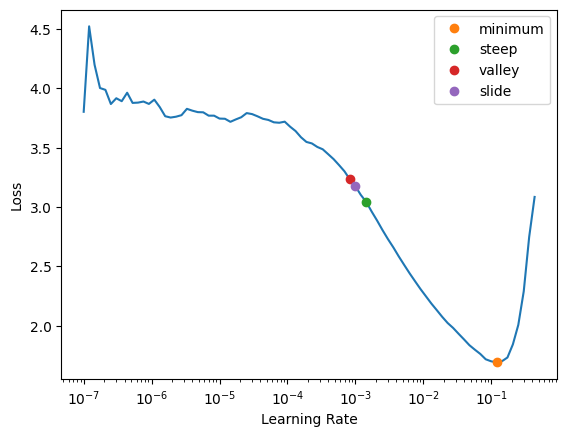

In [5]:
al.lr_find()

2025-01-12 01:29:51.329 | INFO     | active_vision.core:train:70 - Training for 3 epochs with learning rate: 0.001


epoch,train_loss,valid_loss,accuracy,time
0,3.354279,2.264334,0.250000,00:01


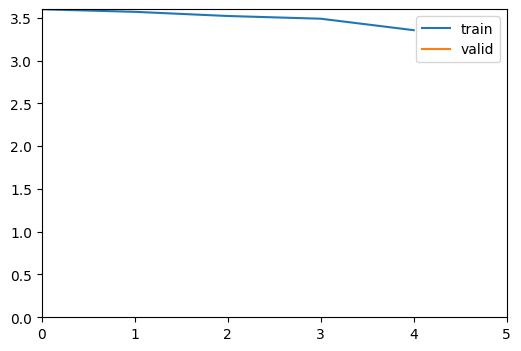

epoch,train_loss,valid_loss,accuracy,time
0,2.370454,1.480246,0.650000,00:01
1,2.073646,0.845469,0.700000,00:01
2,1.688746,0.724268,0.650000,00:01


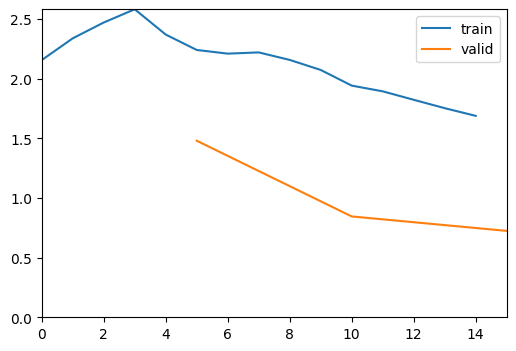

In [6]:
al.train(epochs=3, lr=1e-3)

In [7]:
## Evaluate

import pandas as pd

eval_df = pd.read_parquet("evaluation_samples.parquet")
eval_df.rename(columns={"label_name": "label"}, inplace=True)
eval_df


,filepath,label
0,data/imagenette/2/00000.jpg,cassette player
1,data/imagenette/2/00001.jpg,cassette player
2,data/imagenette/2/00002.jpg,cassette player
3,data/imagenette/2/00003.jpg,cassette player
4,data/imagenette/2/00004.jpg,cassette player
...,...,...
3920,data/imagenette/5/03920.jpg,French horn
3921,data/imagenette/5/03921.jpg,French horn
3922,data/imagenette/5/03922.jpg,French horn
3923,data/imagenette/5/03923.jpg,French horn


In [8]:
al.evaluate(eval_df, "filepath", "label")

2025-01-12 01:30:00.726 | INFO     | active_vision.core:evaluate:110 - Accuracy: 78.19%


0.7819108280254777

In [9]:
import pandas as pd

df = pd.read_parquet("evaluation_samples.parquet").drop(columns=["label_name"])
filepaths = df["filepath"].tolist()

filepaths


['data/imagenette/2/00000.jpg',
 'data/imagenette/2/00001.jpg',
 'data/imagenette/2/00002.jpg',
 'data/imagenette/2/00003.jpg',
 'data/imagenette/2/00004.jpg',
 'data/imagenette/2/00005.jpg',
 'data/imagenette/2/00006.jpg',
 'data/imagenette/2/00007.jpg',
 'data/imagenette/2/00008.jpg',
 'data/imagenette/2/00009.jpg',
 'data/imagenette/2/00010.jpg',
 'data/imagenette/2/00011.jpg',
 'data/imagenette/2/00012.jpg',
 'data/imagenette/2/00013.jpg',
 'data/imagenette/2/00014.jpg',
 'data/imagenette/2/00015.jpg',
 'data/imagenette/2/00016.jpg',
 'data/imagenette/2/00017.jpg',
 'data/imagenette/2/00018.jpg',
 'data/imagenette/2/00019.jpg',
 'data/imagenette/2/00020.jpg',
 'data/imagenette/2/00021.jpg',
 'data/imagenette/2/00022.jpg',
 'data/imagenette/2/00023.jpg',
 'data/imagenette/2/00024.jpg',
 'data/imagenette/2/00025.jpg',
 'data/imagenette/2/00026.jpg',
 'data/imagenette/2/00027.jpg',
 'data/imagenette/2/00028.jpg',
 'data/imagenette/2/00029.jpg',
 'data/imagenette/2/00030.jpg',
 'data/i

In [10]:
pred_df = al.predict(filepaths, batch_size=128)
pred_df


2025-01-12 01:30:00.744 | INFO     | active_vision.core:predict:77 - Running inference on 3925 samples


,filepath,pred_label,pred_conf
0,data/imagenette/2/00000.jpg,cassette player,0.229537
1,data/imagenette/2/00001.jpg,cassette player,0.216116
2,data/imagenette/2/00002.jpg,cassette player,0.229092
3,data/imagenette/2/00003.jpg,gas pump,0.123653
4,data/imagenette/2/00004.jpg,cassette player,0.135393
...,...,...,...
3920,data/imagenette/5/03920.jpg,French horn,0.134341
3921,data/imagenette/5/03921.jpg,French horn,0.152411
3922,data/imagenette/5/03922.jpg,French horn,0.179714
3923,data/imagenette/5/03923.jpg,French horn,0.173746


In [11]:
uncertain_df = al.sample_uncertain(pred_df, num_samples=10)
uncertain_df

,filepath,pred_label,pred_conf
3546,data/imagenette/5/03546.jpg,French horn,0.106965
222,data/imagenette/2/00222.jpg,gas pump,0.107016
2080,data/imagenette/7/02080.jpg,French horn,0.107166
1096,data/imagenette/3/01096.jpg,French horn,0.107718
3167,data/imagenette/6/03167.jpg,English springer,0.108963
1631,data/imagenette/9/01631.jpg,chain saw,0.108974
804,data/imagenette/3/00804.jpg,tench,0.109512
2420,data/imagenette/1/02420.jpg,English springer,0.110322
1673,data/imagenette/9/01673.jpg,chain saw,0.110847
3638,data/imagenette/5/03638.jpg,gas pump,0.111175


In [12]:
uncertain_df.to_parquet("uncertain_samples.parquet")

In [13]:
al.add_to_train_set(uncertain_df)

2025-01-12 01:30:04.815 | INFO     | active_vision.core:add_to_train_set:138 - Adding 10 samples to training set
2025-01-12 01:30:04.816 | INFO     | active_vision.core:add_to_train_set:154 - All new samples added to training set
2025-01-12 01:30:04.817 | INFO     | active_vision.core:add_to_train_set:155 - Training set now has 110 samples


In [14]:
al.train_set

,filepath,label
0,data/imagenette/2/00346.jpg,cassette player
1,data/imagenette/2/00845.jpg,cassette player
2,data/imagenette/2/00383.jpg,cassette player
3,data/imagenette/2/00503.jpg,cassette player
4,data/imagenette/2/00002.jpg,cassette player
...,...,...
105,data/imagenette/9/01631.jpg,chain saw
106,data/imagenette/3/00804.jpg,tench
107,data/imagenette/1/02420.jpg,English springer
108,data/imagenette/9/01673.jpg,chain saw
